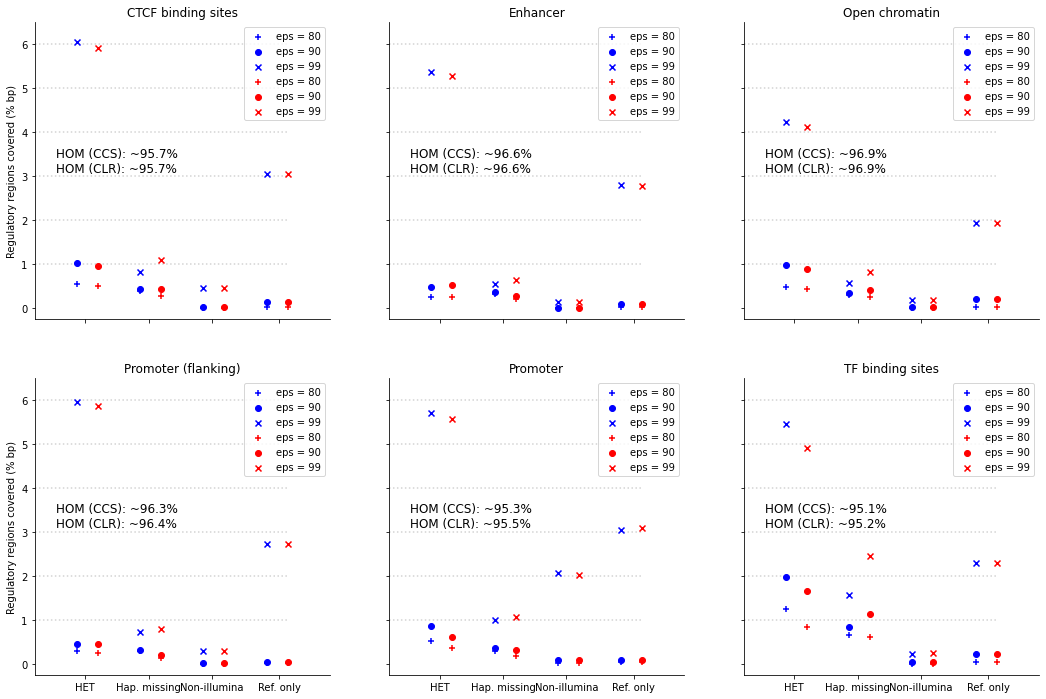

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stats

summary_file = '/home/pebert/work/data/kmer_tables/summary_stats.tsv'

table = pd.read_csv(summary_file, index_col=[0, 1], sep='\t')

titles = {
    'CTCF': 'CTCF binding sites',
    'ENH': 'Enhancer',
    'OPEN': 'Open chromatin',
    'PRFL': 'Promoter (flanking)',
    'PROM': 'Promoter',
    'TFBS': 'TF binding sites'
}

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(18, 12))

# hap_missing
# hap_specific
# non_illumina
# ref_only

row, col = 0, 0
for region, plt_title in titles.items():
    ax = axes[row, col]
    homs = dict()
    for reads, x_vals, color in zip(['ccs', 'clr'], [[0.5, 1.25, 2, 2.75], [0.75, 1.5, 2.25, 3]], ['blue', 'red']):
        both_present = []
        for eps, marker in zip(['80', '90', '99'], ['+', 'o', 'x']):
            hap_present = table.loc[(region, 'hap_present'), 'length_pct_{}_{}'.format(reads, eps)]
            hap_missing = table.loc[(region, 'missing'), 'length_pct_{}_{}'.format(reads, eps)]
            non_illumina = table.loc[(region, 'non_illumina'), 'length_pct_{}_{}'.format(reads, eps)]
            ref_only = table.loc[(region, 'ref_only'), 'length_pct_{}_{}'.format(reads, eps)]
            
            both_present.append(table.loc[(region, 'present'), 'length_pct_{}_{}'.format(reads, eps)])

            ax.scatter(
                x_vals,
                [hap_present, hap_missing, non_illumina, ref_only],
                marker=marker,
                c=color,
                label='eps = {}'.format(eps)
            )
        homs[reads] = round(stats.mean(both_present), 1)
    ax.set_xlim(0, 3.5)
    ax.set_ylim(-0.25, 6.5)
    ax.hlines([1, 2, 3, 4, 5, 6], 0, 3, colors='lightgrey', linestyles='dotted', zorder=0)
    ax.set_title(plt_title)
    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if col == 0:
        ax.set_ylabel('Regulatory regions covered (% bp)')
    joint_text = 'HOM (CCS): ~{}%\n'.format(homs['ccs'])
    joint_text += 'HOM (CLR): ~{}%'.format(homs['clr'])
    ax.text(0.25, 3.1, s=joint_text, fontdict={'fontsize': 12})
    ax.set_xticks([0.6, 1.35, 2.1, 2.9])
    ax.set_xticklabels(['HET', 'Hap. missing', 'Non-illumina', 'Ref. only'])

    col += 1
    if col > 2:
        col = 0
        row = 1